In [1]:
%matplotlib inline


# Read ARM b0 lidar daa



Julie.Lundquist@colorado.edu!

In [2]:
import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
#import netCDF4 as nc                # Another way to deal with netCDF data
import glob
import datetime
import matplotlib.units as munits
import scipy.interpolate
import scipy.signal as sig
import scipy.stats as stats
import sys
import scipy.io as sio

from scipy.optimize import curve_fit
# from netCDF4 import Dataset
from matplotlib import colors as mcolors
from scipy.signal import savgol_filter
from scipy.stats import binned_statistic
from matplotlib.gridspec import GridSpec
from numpy.random import seed
from numpy.random import rand

print('Done importing modules now')

Done importing modules now


# Define filenames to read

In [3]:
filenames = ['~/Documents/CU Boulder/ATOC 5770/project/data_siteH_b1_ALL/arm.lidar.sgp_s6.ppi.b1.20221109.194506.cdf']
#filenames = ['~/Documents/CU Boulder/ATOC 5770/project/data_siteH_b1/arm.lidar.sgp_s6.ppi.b1.20221109.210020.cdf']

In [4]:
dataset = xr.open_dataset(filenames[0], engine='netcdf4')


/opt/homebrew/lib/python3.11/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
dataset

<xarray.Dataset>
Dimensions:                 (time: 24, range: 333)
Coordinates:
  * time                    (time) datetime64[ns] 2022-11-09T19:45:06.028747 ...
  * range                   (range) float32 15.0 45.0 ... 9.945e+03 9.975e+03
Data variables:
    base_time               datetime64[ns] ...
    time_offset             (time) datetime64[ns] ...
    qc_time                 (time) int32 ...
    azimuth                 (time) float32 ...
    elevation               (time) float32 ...
    radial_velocity         (time, range) float32 ...
    qc_radial_velocity      (time, range) int32 ...
    intensity               (time, range) float32 ...
    attenuated_backscatter  (time, range) float32 ...
    lat                     float32 ...
    lon                     float32 ...
    alt                     float32 ...
Attributes: (12/33)
    command_line:                dl_ingest -s sgp -f S6 -D
    process_version:             ingest-dl-2.24-0.el7
    dod_version:                 dlppi-b1-1.1
    site_id:                     sgp
    facility_id:                 S6: Billings, Oklahoma
    input_source:                /data/collection/sgp/sgpdlS6.00/User5_214_20...
    ...                          ...
    datastream:                  sgpdlppiS6.b1
    home_point_azimuth:          0.000000
    target_latitude:             0.000000
    target_longitude:            0.000000
    target_altitude:             0.000000
    history:                     created by user dsmgr on machine prod-proc3....

In [6]:
print(dataset["time"][0])


<xarray.DataArray 'time' ()>
array('2022-11-09T19:45:06.028747000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-11-09T19:45:06.028747
Attributes:
    long_name:  Time offset from midnight


In [7]:
df = dataset.to_dataframe()
df

base_time                time_offset  \
time                       range                                          
2022-11-09 19:45:06.028747 15.0   2022-11-09 2022-11-09 19:45:06.028747   
                           45.0   2022-11-09 2022-11-09 19:45:06.028747   
                           75.0   2022-11-09 2022-11-09 19:45:06.028747   
                           105.0  2022-11-09 2022-11-09 19:45:06.028747   
                           135.0  2022-11-09 2022-11-09 19:45:06.028747   
...                                      ...                        ...   
2022-11-09 19:46:50.543060 9855.0 2022-11-09 2022-11-09 19:46:50.543060   
                           9885.0 2022-11-09 2022-11-09 19:46:50.543060   
                           9915.0 2022-11-09 2022-11-09 19:46:50.543060   
                           9945.0 2022-11-09 2022-11-09 19:46:50.543060   
                           9975.0 2022-11-09 2022-11-09 19:46:50.543060   

                                   qc_time  azimuth  elevation  \
time                       range                                 
2022-11-09 19:45:06.028747 15.0          0      0.0       60.0   
                           45.0          0      0.0       60.0   
                           75.0          0      0.0       60.0   
                           105.0         0      0.0       60.0   
                           135.0         0      0.0       60.0   
...                                    ...      ...        ...   
2022-11-09 19:46:50.543060 9855.0        0    330.0       20.0   
                           9885.0        0    330.0       20.0   
                           9915.0        0    330.0       20.0   
                           9945.0        0    330.0       20.0   
                           9975.0        0    330.0       20.0   

                                   radial_velocity  qc_radial_velocity  \
time                       range                                         
2022-11-09 19:45:06.028747 15.0          -0.152900                   0   
                           45.0          -1.719900                   0   
                           75.0           0.267500                   0   
                           105.0          0.840800                   0   
                           135.0          1.032000                   0   
...                                            ...                 ...   
2022-11-09 19:46:50.543060 9855.0       -17.581400                   0   
                           9885.0       -19.148399                   0   
                           9915.0        -2.675400                   0   
                           9945.0         7.911600                   0   
                           9975.0        14.829500                   0   

                                   intensity  attenuated_backscatter  \
time                       range                                       
2022-11-09 19:45:06.028747 15.0     1.231493            1.303674e-05   
                           45.0     0.932518           -3.805642e-06   
                           75.0     1.079537            4.494966e-06   
                           105.0    1.152402            8.637264e-06   
                           135.0    1.159635            9.079186e-06   
...                                      ...                     ...   
2022-11-09 19:46:50.543060 9855.0   0.997180           -7.872237e-06   
                           9885.0   1.000412            1.157072e-06   
                           9915.0   0.996267           -1.055713e-05   
                           9945.0   1.000300            8.553989e-07   
                           9975.0   0.995280           -1.352669e-05   

                                        lat       lon    alt  
time                       range                              
2022-11-09 19:45:06.028747 15.0    36.43792 -97.40696  305.0  
                           45.0    36.43792 -97.40696  305.0  
                           75.0    36.43792 -97.

In [8]:
i = 0
for index, row in df.iterrows():
    print(index)
    print(row)

(Timestamp('2022-11-09 19:45:06.028747'), 15.0)
base_time                        2022-11-09 00:00:00
time_offset               2022-11-09 19:45:06.028747
qc_time                                            0
azimuth                                          0.0
elevation                                       60.0
radial_velocity                              -0.1529
qc_radial_velocity                                 0
intensity                                   1.231493
attenuated_backscatter                      0.000013
lat                                         36.43792
lon                                        -97.40696
alt                                            305.0
Name: (2022-11-09 19:45:06.028747, 15.0), dtype: object
(Timestamp('2022-11-09 19:45:06.028747'), 45.0)
base_time                        2022-11-09 00:00:00
time_offset               2022-11-09 19:45:06.028747
qc_time                                            0
azimuth                                          0.0


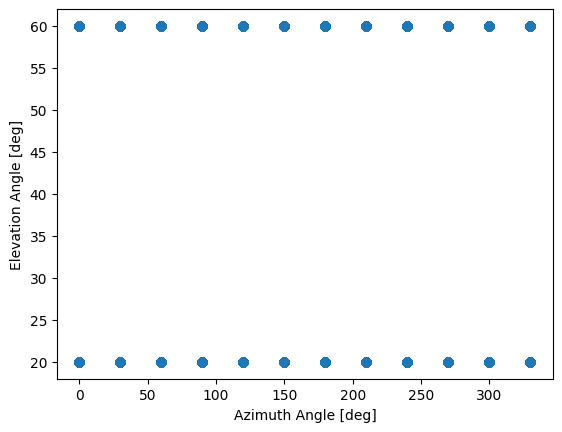

In [13]:
plt.figure()
# plot the azimuth angle vs elevation angle
azimuth_angles = []
elevation_angles = []
radial_velocities = []
qc_radial_velocities = []
measurement_altitudes = []
for index, row in df.iterrows():
    azimuth_angles.append(row["azimuth"])
    elevation_angles.append(row["elevation"])
    radial_velocities.append(row["radial_velocity"])
    qc_radial_velocities.append(row["qc_radial_velocity"])
    # get altitude of the measurement
    range = index[1]
    elevation = row["elevation"]
    measurement_altitude = range*np.cos(np.deg2rad(90-elevation))
    measurement_altitudes.append(measurement_altitude)  
df["measurement_altitude"] = measurement_altitudes

plt.scatter(azimuth_angles, elevation_angles)
plt.xlabel("Azimuth Angle [deg]")
plt.ylabel("Elevation Angle [deg]")
plt.savefig("elev_v_azi.png", format="png", dpi=500)
plt.show()


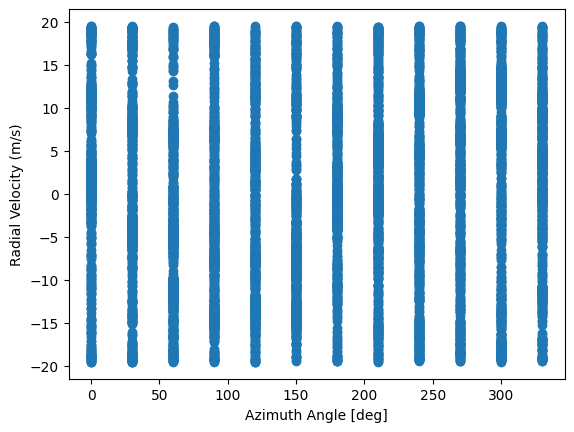

In [10]:
plt.figure()
plt.scatter(azimuth_angles,radial_velocities)
plt.ylabel("Radial Velocity (m/s)")
plt.xlabel("Azimuth Angle [deg]")
plt.show()

In [11]:
# filter df to consider only elevation of 20 degrees and measurement altitude below 500m
df_20 =  df[df['elevation'] == 20.0]  
df_20 = df_20[df_20['measurement_altitude'] <= 500]
df_60 =  df[df['elevation'] == 60.0]  
df_60 = df_60[df_60['measurement_altitude'] <= 500]

In [12]:
# For each altitude, get u, v, w:
unique_altitudes_20 = sorted(df_20['measurement_altitude'].unique())
unique_altitudes_60 = sorted(df_60['measurement_altitude'].unique())
times = []
u_values = []
v_values = []
w_values = []
horizontal_windspeeds = []
horizontal_wind_directions = []
altitudes = []
for ua in unique_altitudes_20:
    # pick out rows at desired altitude
    df_altitude = df_20[df_20['measurement_altitude'] == ua]

    # pick out north, east, south, west velocities and elevation angle
    Vr_north = df_altitude[df_altitude['azimuth'] == 0]['radial_velocity'].values[0]
    Vr_east = df_altitude[df_altitude['azimuth'] == 90]['radial_velocity'].values[0]
    Vr_south = df_altitude[df_altitude['azimuth'] == 180]['radial_velocity'].values[0]
    Vr_west = df_altitude[df_altitude['azimuth'] == 270]['radial_velocity'].values[0]
    elevation = df_altitude[df_altitude['azimuth'] == 0]['elevation'].values[0]
    
    # calculate u, v, w [see HW5 for equations]
    u = (Vr_east - Vr_west)/(2*np.sin(np.deg2rad(90-elevation)))
    v = (Vr_north - Vr_south)/(2*np.sin(np.deg2rad(90-elevation)))
    w = (Vr_north + Vr_south + Vr_east + Vr_west) / (4 * np.cos(np.deg2rad(90-elevation)))
    
    # get timestamp from one of the measurements
    time = df_altitude[df_altitude['azimuth'] == 0].index[0]

    # calculate horizontal windspeed and direction
    horizontal_ws = np.sqrt(u**2 + v**2)
    horizontal_wd = np.arctan2(u, v)+np.pi  # east (u) over north (v)

    # save off data
    times.append(time)
    altitudes.append(ua)
    u_values.append(u)
    v_values.append(v)
    w_values.append(w)
    horizontal_windspeeds.append(horizontal_ws)
    horizontal_wind_directions.append(horizontal_wd)
alex_df_20 = pd.DataFrame(
    list(zip(u_values, v_values, w_values, horizontal_windspeeds, horizontal_wind_directions, altitudes)),
         columns = ["u", "v", "w", "horizontal_windspeed", "horizontal_wind_direction", "altitude"],      
)


times = []
u_values = []
v_values = []
w_values = []
horizontal_windspeeds = []
horizontal_wind_directions = []
altitudes = []
for ua in unique_altitudes_60:
    # pick out rows at desired altitude
    df_altitude = df_60[df_60['measurement_altitude'] == ua]

    # pick out north, east, south, west velocities and elevation angle
    Vr_north = df_altitude[df_altitude['azimuth'] == 0]['radial_velocity'].values[0]
    Vr_east = df_altitude[df_altitude['azimuth'] == 90]['radial_velocity'].values[0]
    Vr_south = df_altitude[df_altitude['azimuth'] == 180]['radial_velocity'].values[0]
    Vr_west = df_altitude[df_altitude['azimuth'] == 270]['radial_velocity'].values[0]
    elevation = df_altitude[df_altitude['azimuth'] == 0]['elevation'].values[0]
    
    # calculate u, v, w [see HW5 for equations]
    u = (Vr_east - Vr_west)/(2*np.sin(np.deg2rad(90-elevation)))
    v = (Vr_north - Vr_south)/(2*np.sin(np.deg2rad(90-elevation)))
    w = (Vr_north + Vr_south + Vr_east + Vr_west) / (4 * np.cos(np.deg2rad(90-elevation)))
    
    # get timestamp from one of the measurements
    time = df_altitude[df_altitude['azimuth'] == 0].index[0]

    # calculate horizontal windspeed and direction
    horizontal_ws = np.sqrt(u**2 + v**2)
    horizontal_wd = np.arctan2(u,v, u)+np.pi  # east (u) over north (v)

    # save off data
    times.append(time)
    altitudes.append(ua)
    u_values.append(u)
    v_values.append(v)
    w_values.append(w)
    horizontal_windspeeds.append(horizontal_ws)
    horizontal_wind_directions.append(horizontal_wd)
alex_df_60 = pd.DataFrame(
    list(zip(u_values, v_values, w_values, horizontal_windspeeds, horizontal_wind_directions, altitudes)),
         columns = ["u", "v", "w", "horizontal_windspeed", "horizontal_wind_direction", "altitude"],       
)




TypeError: return arrays must be of ArrayType

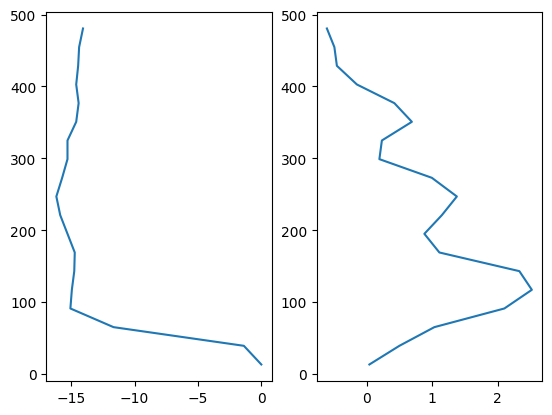

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(u_values, altitudes)
plt.plot()
plt.subplot(1,2,2)
plt.plot(v_values, altitudes)
plt.show()

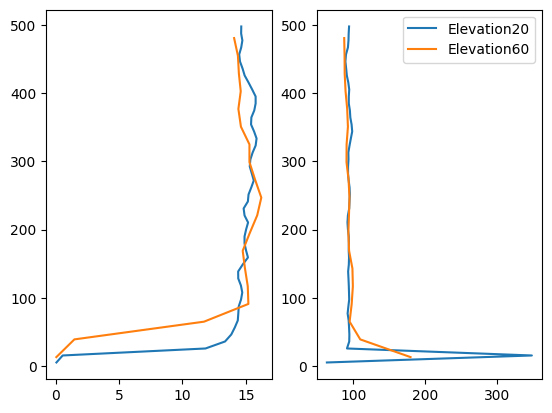

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(alex_df_20["horizontal_windspeed"], alex_df_20["altitude"], label="Elevation20")
plt.plot(alex_df_60["horizontal_windspeed"], alex_df_60["altitude"], label="Elevation60")
plt.plot()
plt.subplot(1,2,2)
plt.plot(np.rad2deg(alex_df_20["horizontal_wind_direction"]), alex_df_20["altitude"], label="Elevation20")
plt.plot(np.rad2deg(alex_df_60["horizontal_wind_direction"]), alex_df_60["altitude"], label="Elevation60")
plt.legend()
plt.show()